In [1]:
import numpy as np
import tensorflow as tf

In [52]:
import matplotlib.pyplot as plt
plt.gray();
plt.rcParams['figure.figsize'] = (7,7);

<Figure size 720x504 with 0 Axes>

In [12]:
def W_matrix(N):
  w_matrix = np.ones([N,2*N], dtype = float)
  for i in range(N):
    for j in range(N):
      w_matrix[i,j] = np.cos(2*np.pi*i*j/N)
    for j in range(N,2*N):
      w_matrix[i,j] = -1*np.sin(2*np.pi*i*(j-N)/N)
  return w_matrix

In [2]:
N = 64

In [13]:
W_x = W_matrix(N)

In [4]:
W_learned = tf.Variable(np.random.random([N, 2 * N]) - 0.5)

n = np.arange(N).reshape([-1, 1])
k = np.arange(N).reshape([1, -1])
arg = 2 * np.pi * n * k / N
cos = tf.cos(arg) / N
sin = tf.sin(arg) / N

In [25]:
losses = []
rmses = []

for i in range(2000):
    x = np.random.random([1, N]) - 0.5
    
    with tf.GradientTape() as tape:
        y_pred = tf.matmul(x, W_learned) # isn't the normal vector matrix multiplication, Has size (64,64)
        y_real = y_pred[:, 0:N]
        y_imag = y_pred[:, N:]
        signal_recon = tf.reduce_sum(y_real * cos - y_imag * sin, axis=1)
        loss = tf.reduce_sum(tf.square(x - signal_recon))

    W_gradient = tape.gradient(loss, W_learned)    
    W_learned = tf.Variable(W_learned - 0.5 * W_gradient)

    losses.append(loss)
    rmses.append(np.sqrt(np.mean((W_learned - W_x)**2)))

Text(0.5, 1.05, 'Fourier Weight Matrix')

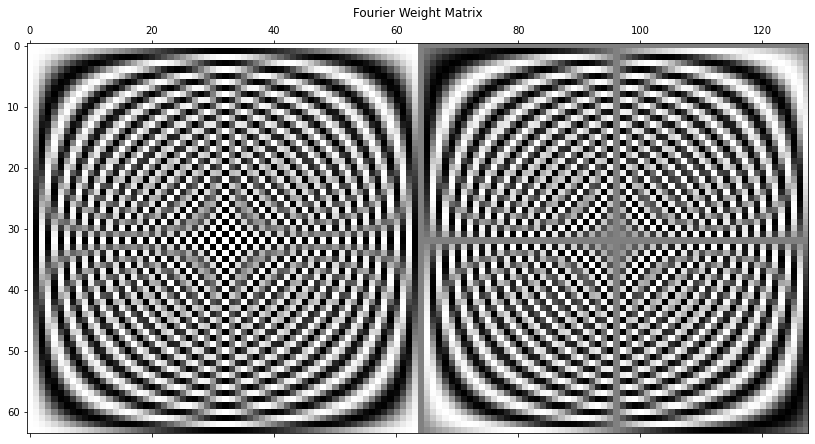

In [53]:
plt.matshow(W_x)
plt.title('Fourier Weight Matrix')

Text(0.5, 1.05, 'Learned Fourier Weight Matrix')

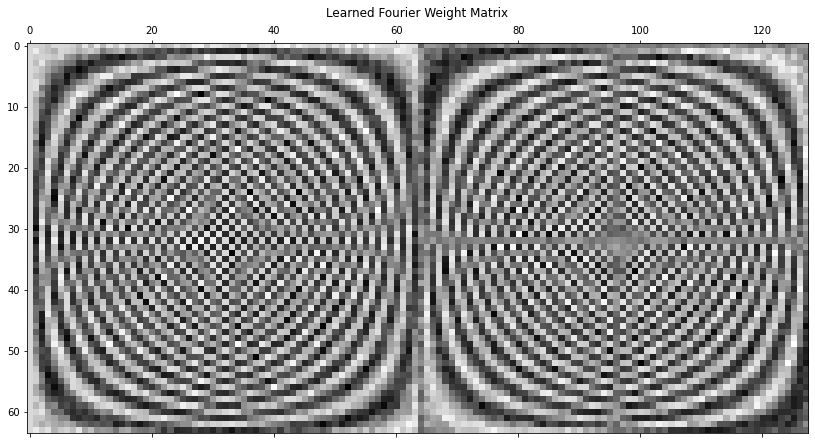

In [54]:
plt.matshow(W_learned)
plt.title('Learned Fourier Weight Matrix')

Text(0.5, 1.0, 'FFT Reconstruction of Signal')

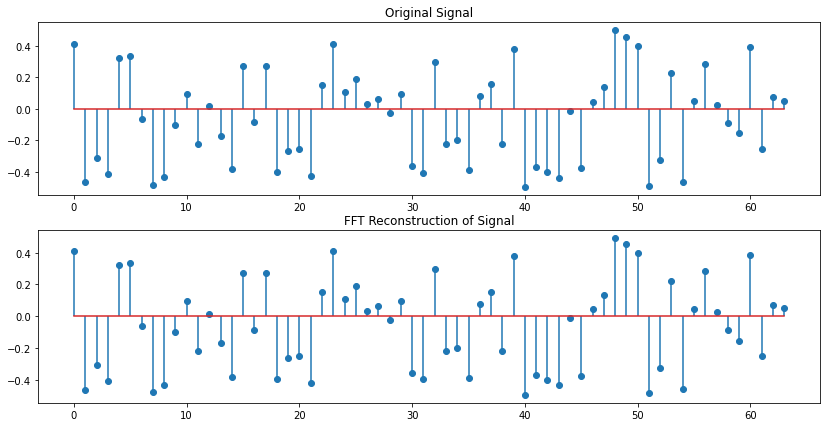

In [56]:
plt.rcParams['figure.figsize'] = (14,7);

plt.subplot(2,1,1)
plt.stem(x.reshape(N,), use_line_collection=True)
plt.title("Original Signal")
plt.subplot(2,1,2)
plt.stem(signal_recon.numpy().reshape(N,), use_line_collection=True)
plt.title("FFT Reconstruction of Signal")

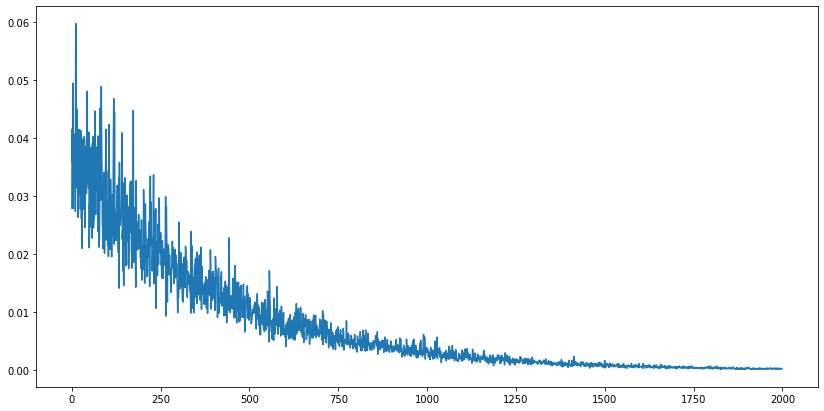

In [58]:
plt.plot(losses)